In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [242]:
ads = pd.read_csv('./Social_Network_Ads.csv')

In [243]:
ads.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [244]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, Normalizer

### Binarizando Gender

In [245]:
le = LabelEncoder()

ads.Gender = le.fit_transform(ads.Gender)

In [246]:
le.inverse_transform([0,1])

array(['Female', 'Male'], dtype=object)

In [247]:
ads.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [248]:
ohe = OneHotEncoder(n_values='auto', categorical_features=[False, True, False, False, False], sparse=False)

trans = ohe.fit_transform(ads)

In [253]:
ads_t = pd.DataFrame(trans, columns=['gender_female', 'gender_male', 'user_id', 'age', 'estimated_salary', 'purchased'])
ads_t.head(5)

,gender_female,gender_male,user_id,age,estimated_salary,purchased
0,0.0,1.0,15624510.0,19.0,19000.0,0.0
1,0.0,1.0,15810944.0,35.0,20000.0,0.0
2,1.0,0.0,15668575.0,26.0,43000.0,0.0
3,1.0,0.0,15603246.0,27.0,57000.0,0.0
4,0.0,1.0,15804002.0,19.0,76000.0,0.0


### Normalizando age e salary

# Classificação

### Naive Bayes

- O **Gaussino** assume que a distribuição P(Xi|Ck) é uma **normal** com parâmetros mi e desvio padrão estimados via máxima verossimilhança, ou seja, **dados contínuos**.
- O **Bernoulli** assume que os dados sejam **binários**.
- O **Multinomial** assume que os dados sejam **discretos** porém não necessariamente binários, com **relação de ordem**, por exemplo, contagem de palavras.

OBS.: Cada P(Xi|Ck) é uma distribuição, seja ela gaussiana, bernoulli ou multinomial.

In [2]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [3]:
data = load_iris(return_X_y=True)
df = pd.DataFrame(data[0], columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df['target'] = data[1]

In [4]:
df.sample(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,target
12,4.8,3.0,1.4,0.1,0
123,6.3,2.7,4.9,1.8,2
35,5.0,3.2,1.2,0.2,0
55,5.7,2.8,4.5,1.3,1
86,6.7,3.1,4.7,1.5,1


In [6]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:4]
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = GaussianNB()
model.fit(X_train,y_train)

result = pd.DataFrame(y_test)
result['predict_naive'] = list(model.predict(X_test))

result.sample(5)

,target,predict_naive
56,1,2
142,2,2
32,0,0
36,0,0
132,2,2


In [7]:
#Definindo probabilidade à priori das classes.
model2 = GaussianNB(priors=[0.2,0.2,0.6])
model2.fit(X_train,y_train)

GaussianNB(priors=[0.2, 0.2, 0.6])

In [8]:
proba = model.predict_proba(X_test)
log_proba = model.predict_log_proba(X_test)

#Nota: A probabilidade do naive bayes não é muito boa, pois usa a hipótese de independência, 
#o que importa é qual possui a maior probabilidade.

Para o **MultinomialNB**, o parâmetro **fit_prior** (default True), especifica se as classes vão possuir probabilidades de acordo com o **dataset** ou uma **distribuição uninforme**.

Para o **BernoulliNB**, o parâmetro **fit_prior** também vale. **Binarize** é o **threshold** para um valor virar True ou continuar False. Por padrão é 0.0, ou seja, 0 é false 1 é true.

Para os dois, **Alpha**, é o parâmetro de suavização de laplace, default 1.0, 0.0 é sem. [VER FÓRMULA DEPOIS]

### Regressão Logística

**Parâmetros:** 

- **penalty** = 'l1' ou 'l2';
- **C** = float, inverso da regularização, pequenos valores são regularizações maiores;
- **fit_intercept** and **intercept_scaling**, define se vai ter bias e quanto é o valor. Default é True e 1.0;
- **class_weight**, dict (pesos customizados) ou balanced (peso proporcional ao dataset) ou None (todos iguais);
- **solver** = VER COM O LUCAS | {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’};

In [9]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [10]:
log_reg = LogisticRegression(penalty='l2', C=1.0)
log_reg.fit(X_train, y_train)

result['log_reg'] = list(log_reg.predict(X_test))
result.sample(5)

,target,predict_naive,log_reg
31,0,0,0
42,0,0,0
85,1,1,1
146,2,2,2
22,0,0,0


In [11]:
#Peso de cada feature depois de fittado. Tem 3 pois como é um problema multiclasse, é fittado um log reg binário para cada
#classe, é 1 ou não, é 2 ou não. 

log_reg.coef_

array([[ 0.37837225,  1.3362905 , -2.08244463, -0.93126854],
       [ 0.34937592, -1.44126614,  0.48555836, -1.08172903],
       [-1.45856852, -1.43890209,  2.19420366,  2.10495849]])

In [12]:
#Com elastic net

el = SGDClassifier(loss='log', penalty='elasticnet', alpha=0.0001, l1_ratio=0.5, tol=0.0001)
el.fit(X_train, y_train)

result['log_reg_el'] = list(el.predict(X_test))
result.sample(5)

,target,predict_naive,log_reg,log_reg_el
22,0,0,0,0
56,1,2,1,0
31,0,0,0,0
9,0,0,0,0
45,0,0,0,0


### Knn

- **algorithm:** auto acha o melhor. Pode ser ball_tree, kd_tree ou brute. 
- **leaf_size:** VER DPS.
- **p:** power da distância de Minkowski.
- **metrics:** podem ser outras, ver documentação da DistanceMetrics.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='kd_tree', leaf_size=30, p=2, metric='minkowski')

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [15]:
#Retorna os k vizinhos e a distância.
knn.kneighbors([[1,1,1,1]])

(array([[3.81051178, 3.96358424, 3.99624824, 4.03608721, 4.27317212]]),
 array([[71, 47, 46, 52, 50]], dtype=int64))

In [16]:
result['knn'] = list(knn.predict(X_test))
result.sample(5)

,target,predict_naive,log_reg,log_reg_el,knn
108,2,2,2,2,2
27,0,0,0,0,0
12,0,0,0,0,0
109,2,2,2,2,2
18,0,0,0,0,0


### SVM

- **C:** 1/alpha, ou seja, quanto menor que 1, permite um svm mais relaxado. É o peso da missclassification na cost func.
- **kernel:** ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ ou ‘precomputed’.
- **degree:** grau do polinomial.
- **gamma:** 1/n_features é o padrão do parâmetro do kernel.
- **probability:** True para retornar as probabilidades.

In [17]:
from sklearn.svm import SVC

In [18]:
svm = SVC(C=1.0, kernel='rbf', gamma=0.25, probability=True)

svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
result['svm'] = list(svm.predict(X_test))
result.sample(5)

,target,predict_naive,log_reg,log_reg_el,knn,svm
15,0,0,0,0,0,0
137,2,2,2,2,2,2
30,0,0,0,0,0,0
36,0,0,0,0,0,0
141,2,2,2,2,2,2


In [20]:
#Distância ao plano separadore.
svm.decision_function([[1,1,1,1]])

array([[-0.35238517,  0.85238517,  2.5       ]])

### Decision Tree

- **criterion:** 'gini' ou 'entropy'.
- **splitter:** 'best' ou 'random' para o melhor de um sample de tamanho 'max_features' random.
- **max_depth:** int que diz a profundidade máxima da árvore. Se None, vai até os nós serem puros ou terem menos de min_samples_split elementos.
- **min_samples_split:** número mínimo para splitar um nó (critério de parada do max_depth).
- **min_samples_leaf:** número mínimo para um nó poder ser uma folha. Dúvidas: https://stackoverflow.com/questions/46480457/difference-between-min-samples-split-and-min-samples-leaf-in-sklearn-decisiontre
- **min_weight_fraction_leaf:** porcentagem de peso (com relação ao peso total do input) para poder ser uma folha.
- **max_features:** número máximo de features a serem olhadas'.
- **max_leaf_nodes:** número máximo de folhas.
- **min_impurity_decrease:** Só splita um nó se a impureza descresceu este valor.
- **min_impurity_split:** threshold para splitar um nó, ou seja, se a impureza for menor qu este parâmetro, nem precisas dividir, já ta bom.
- **class_weight:** Dicionário com os pesos de cada classe ou 'balanced', pesos são atribuidos com base na proporção da base. Default é 1 para todas as classes.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus

In [22]:
tree_clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=3)

tree_clf.fit(X_train, y_train, sample_weight=[1 for x in X_train.iterrows()])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
result['tree'] = list(tree_clf.predict(X_test))
result.sample(5)

,target,predict_naive,log_reg,log_reg_el,knn,svm,tree
45,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0
51,1,1,1,0,1,1,1
78,1,1,1,1,1,1,1


In [24]:
tree_clf.feature_importances_

array([0.03480439, 0.02820088, 0.06899526, 0.86799947])

In [25]:
tree.export_graphviz(tree_clf, out_file='tree.dot', feature_names=list(df.columns)[:4], 
                     class_names=['Setosa','Versicolour', 'Virginica'], filled=True, leaves_parallel=True, rounded=True) 
#acessar: http://www.webgraphviz.com/ e colar o que tem em tree.dot

### Random Forest

- Todos os parâmetros da árvore de decisão.
- IMPORTANTE: não tem como controlar o tamanho do dataset de cada árvore fitada. Uma alternativa seria usar o bagging e passar uma decision tree normal.

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_features=0.5, bootstrap=True, 
                            oob_score=False, random_state=10)

rf.fit(X_train, y_train)

result['random_forest'] = list(rf.predict(X_test))
result.sample(5)

,target,predict_naive,log_reg,log_reg_el,knn,svm,tree,random_forest
64,1,1,1,0,1,1,1,1
11,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0
85,1,1,1,0,1,1,1,1
51,1,1,1,0,1,1,1,1


### Bagging

- **base_estimator:** método de classificação já com os parâmetros.
- **n_estimators:** número de modelos.
- **max_samples:** int ou float, qtd ou porcentagem. Quantidade de samples para treino de cada modelo.
- **max_features:** int ou float, qtd ou porcentagem. Quantidade de features usadas para treino de cada modelo.

In [28]:
from sklearn.ensemble import BaggingClassifier

In [29]:
bag = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, max_samples=0.5, max_features=0.5, 
                        bootstrap=True, bootstrap_features=False, oob_score=True, random_state=None)

bag.fit(X_train, y_train)

result['bagging'] = list(bag.predict(X_test))
result.sample(5)

,target,predict_naive,log_reg,log_reg_el,knn,svm,tree,random_forest,bagging
10,0,0,0,0,0,0,0,0,0
81,1,1,1,1,1,1,1,1,1
32,0,0,0,0,0,0,0,0,0
108,2,2,2,2,2,2,2,2,2
131,2,2,2,2,2,2,2,2,2


In [30]:
bag.estimators_[:2]

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform')]

In [31]:
#Dos samples da base de treino (total 100), marca se foi usado ou não para cada estimator.
bag.estimators_samples_[1]

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
       False,  True,  True, False, False, False, False,  True,  True,
        True, False, False, False, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
        True, False, False,  True, False,  True, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True])

In [32]:
bag.estimators_features_[:3]

[array([0, 3]), array([3, 1]), array([3, 0])]

In [33]:
bag.oob_score_

0.95

### Boosting

- **Learnning rate:** .
- **algorithm:** SAMME ou SAMME.R, um discreto e o outro usa probabilidades.

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, learning_rate=0.9)

ada.fit(X_train, y_train)

result['ada'] = list(ada.predict(X_test))
result.sample(5)

,target,predict_naive,log_reg,log_reg_el,knn,svm,tree,random_forest,bagging,ada
32,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0
145,2,2,2,2,2,2,2,2,2,2


In [78]:
ada.estimator_weights_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [79]:
ada.estimator_errors_

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Métricas de avaliação

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [123]:
from sklearn.datasets import make_classification

X, y = make_classification()

In [207]:
model = LogisticRegression()
model.fit(X, y)

y_true  = y
y_pred  = model.predict(X)
y_score = model.predict_proba(X)

In [213]:
print(np.round(accuracy_score(y_true, y_pred, sample_weight=None), decimals=2),
      np.round(precision_score(y_true, y_pred), decimals=2), 
      np.round(recall_score(y_true, y_pred), decimals=2),
      np.round(f1_score(y_true, y_pred), decimals=2),
      np.round(roc_auc_score(y_true, y_score[:,1]), decimals=2))

0.89 0.9 0.88 0.89 0.97


In [209]:
cm = confusion_matrix(y_true, y_pred, sample_weight=None)
normalized_cm = np.zeros(cm.shape)

for row in range(len(cm)):
    total = cm[row].sum()
    for elem in range(len(cm[row])):
        normalized_cm[row,elem] = float(cm[row,elem])/float(total)
        
cm

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [210]:
normalized_cm

array([[0.9 , 0.1 ],
       [0.12, 0.88]])

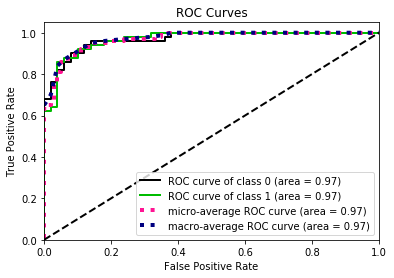

In [215]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_true, y_score)
plt.show()

In [216]:
#KS

#### Para multiclass: 

- **average:** 'micro' (calcula métricas de fp, fn, tp globais), 'macro' (faz métricas para cada classe), 'weighted' (mesma do macro mas usa a quantidade de uma classe para ponderar o peso da métrica).

# Regressão

In [35]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [36]:
Xl = df.iloc[:,:3]
yl = df['Petal Width']
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size=0.33, random_state=42)

In [37]:
result_l = pd.DataFrame(yl_test)

In [38]:
#Sem regularização
lr = LinearRegression(normalize=True, copy_X=True)
lr.fit(Xl_train, yl_train)

result_l['lr_normal'] = list(lr.predict(Xl_test))

lr.coef_

array([-0.26112897,  0.25780067,  0.54432941])

In [39]:
#Com l1
lr2 = Lasso(alpha=0.001, max_iter=1000, normalize=True, copy_X=True)
lr2.fit(Xl_train, yl_train)

result_l['lr_l1'] = list(lr2.predict(Xl_test))

list(lr2.coef_)

[-0.10430252822604663, 0.12660120807021039, 0.46198588646856414]

In [40]:
#Com l2
lr3 = Ridge(alpha=0.001, max_iter=1000, normalize=True, copy_X=True)
lr3.fit(Xl_train, yl_train)

result_l['lr_l2'] = list(lr3.predict(Xl_test))

list(lr3.coef_)

[-0.25322580701377256, 0.2518762072897433, 0.5399905054938664]

In [41]:
#Com elastic_net
lr4 = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=1000, normalize=True, copy_X=True)
lr4.fit(Xl_train, yl_train)

result_l['lr_elastic'] = list(lr4.predict(Xl_test))

list(lr4.coef_)

[0.0, 0.04687718798362693, 0.394871244538662]

In [42]:
result_l.sample(6)

,Petal Width,lr_normal,lr_l1,lr_l2,lr_elastic
32,0.1,0.399417,0.350226,0.398128,0.354367
109,2.5,2.252174,2.203456,2.249695,2.147336
45,0.3,0.165855,0.206488,0.168356,0.263315
73,1.2,1.571114,1.570127,1.570756,1.557015
142,1.9,1.841405,1.773552,1.837532,1.710275
31,0.4,0.166731,0.240745,0.171170,0.321553


### Outros modelos para regressão

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [44]:
rtree = DecisionTreeRegressor(criterion='mse')
    
rtree.fit(Xl_train, yl_train)

result_l['tree'] = list(rtree.predict(Xl_test))

In [45]:
knnr = KNeighborsRegressor()
    
knnr.fit(Xl_train, yl_train)

result_l['knn_regression'] = list(knnr.predict(Xl_test))

In [46]:
svr = SVR()
    
svr.fit(Xl_train, yl_train)

result_l['svr'] = list(svr.predict(Xl_test))

In [47]:
result_l.sample(6)

,Petal Width,lr_normal,lr_l1,lr_l2,lr_elastic,tree,knn_regression,svr
19,0.3,0.348190,0.322676,0.347888,0.340304,0.4,0.26,0.267136
108,1.8,1.935859,1.977750,1.937247,1.977310,1.4,2.00,1.786725
145,2.3,1.738162,1.763859,1.739191,1.763826,2.1,1.94,1.858852
137,1.8,2.005579,1.946406,2.002343,1.886975,2.3,2.06,2.131832
141,2.3,1.657283,1.709460,1.659734,1.729026,2.1,1.74,1.789774
9,0.1,0.219955,0.254916,0.222220,0.307490,0.1,0.16,0.199525


### Métricas de avaliação

In [217]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [219]:
model_r = LinearRegression()
model_r.fit(Xl_train, yl_train)

y_true_r = yl_test
y_pred_r = model_r.predict(Xl_test)

print(np.round(mean_absolute_error(y_true_r, y_pred_r, sample_weight=None), decimals=2),
      np.round(mean_squared_error(y_true_r, y_pred_r), decimals=2), 
      np.round(r2_score(y_true_r, y_pred_r), decimals=2))

0.14 0.04 0.94


### Gradient Boosting Regressor

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [82]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

# Agrupamento

### K-Means

In [48]:
from sklearn.cluster import KMeans

In [49]:
centroid = np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3]])
centroid

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [50]:
#init: clusteres iniciais
#n_init: número de vezes que vai começar um k-means com seed diferente.

km_test = KMeans(n_clusters=3, init=centroid, n_init=1, tol=0.0001)
km = KMeans(n_clusters=3)

km.fit(df.iloc[:,:4])

km.predict(df.iloc[:,:4].sample(10))

array([0, 0, 0, 2, 0, 0, 1, 0, 0, 2])

In [51]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Hieráquico

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

**Scipy**

- **Primeiro argumento** é matriz de distância retornada por _pdist_ ou conjunto de observações.
- **method:** single, complete, average ou ward.
- **metric:** para calcular a matriz de distância, caso não seja dada. Ver todas em https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html.
- **Retorna** uma matrix no formato de linkage. Usar _fcluster_ ou _dendrogram_ para ver.

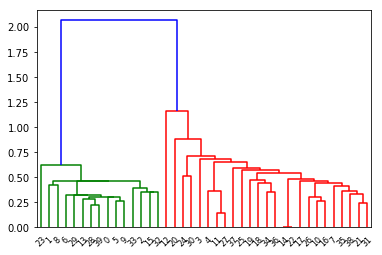

In [53]:
hc = linkage(df.iloc[:,:4].sample(40), method='single', metric='euclidean')
plt.figure()
dendrogram(hc)
plt.show()

In [54]:
fcluster(hc,t=1.25, criterion ='distance')

array([1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1], dtype=int32)

### DBScan

- eps: distância máxima para ser considerado vizinho.
- min_samples: número mínimo ou soma de pesos mínima para um ponto ser considerado core point.
- metric: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html qualquer uma.
- algorithm: 'bal_tree', 'kd_tree', 'brute'.
- p: power of Minkowski.

In [55]:
from sklearn.cluster import DBSCAN

In [56]:
db = DBSCAN(eps=0.3, min_samples=10, metric='euclidean', algorithm='brute')

db.fit_predict(df.iloc[:,:4])[:10]

array([ 0,  0,  0,  0,  0, -1, -1,  0, -1,  0], dtype=int64)

In [57]:
db.core_sample_indices_

array([ 0,  4,  7,  9, 12, 17, 27, 30, 34, 37, 39, 45, 49], dtype=int64)

In [58]:
np.unique(db.labels_)

array([-1,  0], dtype=int64)

### Gaussian Mixture Model

- weights_init: que porra é essa.
- means_init: média dos componentes.
- precisions_init: uma matrix feature x feature para cada componente, sendo o iverso da matrix de covariância.

In [59]:
from sklearn.mixture import GaussianMixture

In [60]:
cov_mat = np.array([[[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]],
                    [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]],
                    [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]])

In [61]:
gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=100, n_init=1, weights_init=[0.2,0.2,0.6], 
                      means_init=[[1,1,1,1],[2,2,2,2],[3,3,3,3]], precisions_init=cov_mat)

gmm.fit(df.iloc[:,:4])

gmm.predict(df.iloc[:,:4].sample(5))

array([2, 1, 2, 0, 2], dtype=int64)

In [62]:
#Dado um ponto, retorna a probabilidade de pertencer a cada um dos n clusteres.
gmm.predict_proba(df.iloc[:,:4].sample(5))

array([[4.23569091e-05, 9.99957643e-01, 5.13718545e-17],
       [1.27885402e-04, 9.99871775e-01, 3.40049527e-07],
       [0.00000000e+00, 1.26229659e-81, 1.00000000e+00],
       [0.00000000e+00, 6.66742716e-94, 1.00000000e+00],
       [0.00000000e+00, 3.89174758e-74, 1.00000000e+00]])

In [63]:
print(gmm.weights_,'\n\n',gmm.means_,'\n\n',gmm.covariances_,'\n\n',gmm.converged_)

[0.09062    0.24271325 0.66666675] 

 [[4.8967348  3.32444189 1.41159932 0.20010569]
 [5.04679566 3.45293135 1.48356447 0.26038848]
 [6.26199979 2.87199997 4.90599956 1.67599983]] 

 [[[ 0.11561732  0.10786095  0.02208479 -0.00511506]
  [ 0.10786095  0.16795556  0.02345769 -0.01315353]
  [ 0.02208479  0.02345769  0.00634564 -0.00146125]
  [-0.00511506 -0.01315353 -0.00146125  0.0014611 ]]

 [[ 0.11793846  0.08947742  0.01053959  0.01364558]
  [ 0.08947742  0.12820108  0.00445017  0.01819795]
  [ 0.01053959  0.00445017  0.03674387  0.00703503]
  [ 0.01364558  0.01819795  0.00703503  0.01393746]]

 [[ 0.4349573   0.12093604  0.44882868  0.16548827]
  [ 0.12093604  0.10961701  0.1413681   0.07922803]
  [ 0.44882868  0.1413681   0.67476646  0.28584458]
  [ 0.16548827  0.07922803  0.28584458  0.17862522]]] 

 True


## Sampling

### Hold-out

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X, y = np.arange(10).reshape((5, 2)), list(range(5))
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [66]:
y

[0, 1, 2, 3, 4]

In [67]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10,
                                               shuffle=True, stratify=None)

print(Xtrain, '\n\n', ytrain)

[[0 1]
 [8 9]
 [2 3]] 

 [0, 4, 1]


In [68]:
print(Xtest, '\n\n', ytest)

[[4 5]
 [6 7]] 

 [2, 3]


In [69]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=3, test_size=2, shuffle=False, stratify=None)

print(Xtrain, '\n\n', ytrain)

[[0 1]
 [2 3]
 [4 5]] 

 [0, 1, 2]


In [70]:
print(Xtest, '\n\n', ytest)

[[6 7]
 [8 9]] 

 [3, 4]


### K-fold

- **groups:** lista com o tamanho do X. Especifíca a divisão dos grupos.
- **cv:** pode ser o número de KFolds (no caso de ser classificação ele faz um stratified). Ou ainda, passar o return de um cross-validation generator, como Kfolds.
- **scoring:** pode ser http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter ou multiplos, ('metric1', 'metric2').
- **leave-one-out** é só n_splits=n.

In [71]:
from sklearn.model_selection import cross_validate, KFold, cross_val_score

In [72]:
kfolds = KFold(n_splits=5, shuffle=False, random_state=None)

In [113]:
cross_validate(estimator=KNeighborsClassifier(n_neighbors=5), X=df.iloc[:,:4], y=df.target, cv=kfolds, 
               scoring='accuracy', return_train_score=True)

{'fit_time': array([0., 0., 0., 0., 0.]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([1.        , 1.        , 0.83333333, 0.93333333, 0.8       ]),
 'train_score': array([0.95833333, 0.95833333, 0.99166667, 0.975     , 0.98333333])}

### K-fold na mão

In [119]:
from sklearn.metrics import accuracy_score

cv = KFold(n_splits=5, shuffle=False)

X = df.iloc[:,:4]
y = df.target

tr_scores = []
te_scores = []

knn = KNeighborsClassifier(n_neighbors=5)

for tr_index, te_index in cv.split(X):
    tr_X = X.iloc[tr_index,:]
    te_X = X.iloc[te_index,:]
    tr_y = y[tr_index]
    te_y = y[te_index]
    
    model = knn.fit(tr_X, tr_y)
    
    tr_pred = model.predict(tr_X)
    te_pred = model.predict(te_X)
    
    tr_scores.append(accuracy_score(tr_y, tr_pred))
    te_scores.append(accuracy_score(te_y, te_pred))

In [120]:
print(tr_scores, '\n\n', te_scores)

[0.9583333333333334, 0.9583333333333334, 0.9916666666666667, 0.975, 0.9833333333333333] 

 [1.0, 1.0, 0.8333333333333334, 0.9333333333333333, 0.8]
